##Introduction
This notebook explores the Car Prices Prediction Dataset to build a predictive model for estimating car prices based on various features. The dataset consists of information about different car models, including the make, model, year of manufacture, mileage, and condition, among other attributes. The goal of this analysis is to understand how these factors influence the price of a car and to develop a linear regression model that can accurately predict car prices.

###Key features of the dataset include:

* Make: The manufacturer of the car (e.g., Ford, Toyota, Chevrolet).
* Model: The specific model of the car (e.g., Silverado, Civic).
* Year: The year in which the car was manufactured.
* Mileage: The total distance traveled by the car.
* Condition: The overall condition of the car (e.g., Excellent, Good).
* Price: The target variable representing the car's price.

###Objective
The primary objective of this project is to build a linear regression model using Gradient Descent to predict car prices based on the available features. In this notebook, the following steps will be undertaken:

####1) Data Preprocessing: Cleaning the data, handling categorical variables, and normalizing the feature set.
####2) Exploratory Data Analysis (EDA): Understanding relationships between features and the target variable (Price).
####3) Modeling: Implementing a linear regression model using Gradient Descent.
####4) Evaluation: Assessing the model's performance using evaluation metrics such as Mean Squared Error (MSE) and R-squared score.
####5) Visualization: Visualizing the best-fit line for key features and understanding the impact of each feature on car prices.

By the end of this analysis, we aim to create a robust model capable of predicting car prices and provide insights into the key factors affecting car value in the market.



In [1]:
# Import necessary libraries
import numpy as np # NumPy is a powerful tool for numerical computations in Python
import matplotlib.pyplot as plt #Data Visualization
import pandas as pd # Pandas is a powerful library for data manipulation and analysis.



In [2]:
df = pd.read_csv('CarPricesPrediction.csv') #The df = pd.read_csv line reads a CSV file into a DataFrame named df using the pandas library.

In [3]:
df.head()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [4]:
# Checking for missing values
df.isnull().sum()


,0
Unnamed: 0,0
Make,0
Model,0
Year,0
Mileage,0
Condition,0
Price,0


There are no missing values in the dataset

For Logistic Regression, we will create a binary classification problem (e.g., "Expensive" vs. "Affordable"). We'll define the threshold for the price.

In [5]:
# Create a binary variable 'Expensive' based on a price threshold
threshold = df['Price'].median()
df['Expensive'] = (df['Price'] > threshold).astype(int)


####Feature Scaling
Gradient Descent works best when the features are scaled, so we will standardize the numerical features.

In [6]:
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_features = ['Year', 'Mileage']

# Standardize the features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


###Drop the Index Column

In [7]:
data_cleaned = df.drop(columns=['Unnamed: 0'])


In [8]:
df.head()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price,Expensive
0,0,Ford,Silverado,1.622767,-1.524017,Excellent,19094.75,0
1,1,Toyota,Silverado,-0.493311,-1.637747,Excellent,27321.10,1
2,2,Chevrolet,Civic,0.035709,-0.822225,Good,23697.30,1
3,3,Ford,Civic,1.622767,-1.100285,Excellent,18251.05,0
4,4,Chevrolet,Civic,0.829238,-0.382497,Excellent,19821.85,0


In [9]:
data_cleaned.head()

,Make,Model,Year,Mileage,Condition,Price,Expensive
0,Ford,Silverado,1.622767,-1.524017,Excellent,19094.75,0
1,Toyota,Silverado,-0.493311,-1.637747,Excellent,27321.10,1
2,Chevrolet,Civic,0.035709,-0.822225,Good,23697.30,1
3,Ford,Civic,1.622767,-1.100285,Excellent,18251.05,0
4,Chevrolet,Civic,0.829238,-0.382497,Excellent,19821.85,0


####One-Hot Encoding: Use pd.get_dummies() to convert the categorical variables (Make, Model, Condition) into numeric form.

This will prepare the data for performing linear regression using gradient descent. You can then split the data into training and testing sets and implement the gradient descent algorithm. Let me know if you'd like further guidance on these steps

In [10]:
data_encoded = pd.get_dummies(data_cleaned, columns=['Make', 'Model', 'Condition'], drop_first=True)


## Step 1: Split the Dataset into Features and Target

In [11]:
# Split the dataset into features (X) and target (y)
X = data_encoded.drop('Price', axis=1)  # Features (dropping target column)
y = data_encoded['Price']               # Target (Price)


####Step 2: Split the Data into Training and Testing Sets
* Split the dataset into training and testing sets (80/20 split is common).

In [12]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###Step 3: Standardize the Features
* Standardize the features to ensure they are on the same scale for better gradient descent performance.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


###Step 4: Initialize Weights and Bias
* Initialize the weights (coefficients) and bias term.

In [14]:
import numpy as np

# Initialize weights to zeros (or random values) and bias
n_features = X_train_scaled.shape[1]
weights = np.zeros(n_features)  # Initialize weights to zeros
bias = 0  # Initialize bias


###Step 5: Define the Hypothesis Function (Linear Model)
* The linear hypothesis function is simply a weighted sum of inputs plus bias.

In [15]:
def predict(X, weights, bias):
    return np.dot(X, weights) + bias


###Step 6: Define the Cost Function (Mean Squared Error)
* The cost function evaluates how well the model is performing.

In [16]:
def compute_cost(X, y, weights, bias):
    m = len(y)
    predictions = predict(X, weights, bias)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost


###Step 7: Implement Gradient Descent
* Use gradient descent to update weights and bias to minimize the cost function.

In [17]:
def gradient_descent(X, y, weights, bias, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for i in range(epochs):
        predictions = predict(X, weights, bias)

        # Calculate gradients
        dW = (1 / m) * np.dot(X.T, (predictions - y))  # Gradient for weights
        dB = (1 / m) * np.sum(predictions - y)         # Gradient for bias

        # Update weights and bias
        weights -= learning_rate * dW
        bias -= learning_rate * dB

        # Compute the cost for each iteration
        cost = compute_cost(X, y, weights, bias)
        cost_history.append(cost)

        # Optionally print the cost every 100 epochs
        if i % 100 == 0:
            print(f"Epoch {i}, Cost: {cost}")

    return weights, bias, cost_history


###Step 8: Train the Model
* Train the linear regression model using gradient descent.

In [18]:
# Set learning rate and number of epochs
learning_rate = 0.01
epochs = 3000

# Train the model
weights, bias, cost_history = gradient_descent(X_train_scaled, y_train, weights, bias, learning_rate, epochs)


Epoch 0, Cost: 249124365.58444694
Epoch 100, Cost: 32955408.803355537
Epoch 200, Cost: 4690634.621931773
Epoch 300, Cost: 849140.1639047674
Epoch 400, Cost: 279864.72056484746
Epoch 500, Cost: 162346.41439401262
Epoch 600, Cost: 115634.28285154533
Epoch 700, Cost: 86111.35770151143
Epoch 800, Cost: 64668.20487782642
Epoch 900, Cost: 48644.668432638675
Epoch 1000, Cost: 36605.8304685943
Epoch 1100, Cost: 27550.39734109368
Epoch 1200, Cost: 20736.746258985837
Epoch 1300, Cost: 15609.087146593198
Epoch 1400, Cost: 11749.842051799627
Epoch 1500, Cost: 8845.036496399618
Epoch 1600, Cost: 6658.508634063821
Epoch 1700, Cost: 5012.582852812532
Epoch 1800, Cost: 3773.562749841382
Epoch 1900, Cost: 2840.832526642929
Epoch 2000, Cost: 2138.664752889952
Epoch 2100, Cost: 1610.0600000082873
Epoch 2200, Cost: 1212.1130294603056
Epoch 2300, Cost: 912.5264877804179
Epoch 2400, Cost: 686.9875138113645
Epoch 2500, Cost: 517.1934340674479
Epoch 2600, Cost: 389.36581182781055
Epoch 2700, Cost: 293.1319775

###Step 9: Evaluate the Model
* After training, evaluate the model on the test set.

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = predict(X_test_scaled, weights, bias)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 302.94975181213806
R-squared Score: 0.9999850492399703


###Step 10: Visualize the Cost Function (Optional)
* We can plot the cost over epochs to visualize how the cost decreases as the model trains.

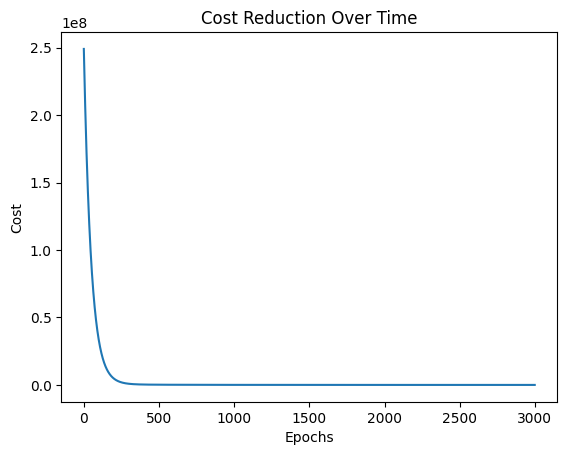

In [20]:
import matplotlib.pyplot as plt

plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Reduction Over Time')
plt.show()
